<a href="https://colab.research.google.com/github/Hawawou/UE-803/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
rdf_cs = pd.read_csv('rdf_cs.csv')
rdf_cs

,subject,predicate,object,category
0,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2002/07/owl#Thing,computer_scientists
1,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://xmlns.com/foaf/0.1/Person,computer_scientists
2,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://dbpedia.org/ontology/Person,computer_scientists
3,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.ontologydesignpatterns.org/ont/dul/...,computer_scientists
4,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.wikidata.org/entity/Q19088,computer_scientists
...,...,...,...,...
8716,http://dbpedia.org/resource/Jeff_Bezos,http://www.w3.org/2000/01/rdf-schema#comment,"Jeff Bezos, właśc. Jeffrey Preston Bezos (ur. ...",computer_scientists
8717,http://dbpedia.org/resource/Jeff_Bezos,http://www.w3.org/2000/01/rdf-schema#comment,"Jeffrey Preston Bezos (Albuquerque, 12 januari...",computer_scientists
8718,http://dbpedia.org/resource/Jeff_Bezos,http://www.w3.org/2000/01/rdf-schema#comment,"Jeffrey Preston Bezos, nato Jorgensen (Albuque...",computer_scientists
8719,http://dbpedia.org/resource/Jeff_Bezos,http://www.w3.org/2000/01/rdf-schema#comment,"Jeffrey Preston ""Jeff"" Bezos, ursprungligen Jo...",computer_scientists


In [3]:
rdf_sculptor = pd.read_csv('rdf_sculptor.csv')
rdf_sculptor

,subject,predicate,object,category
0,http://dbpedia.org/resource/Aisa_Amittu,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2002/07/owl#Thing,sculptor
1,http://dbpedia.org/resource/Aisa_Amittu,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://xmlns.com/foaf/0.1/Person,sculptor
2,http://dbpedia.org/resource/Aisa_Amittu,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://dbpedia.org/ontology/Person,sculptor
3,http://dbpedia.org/resource/Aisa_Amittu,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.ontologydesignpatterns.org/ont/dul/...,sculptor
4,http://dbpedia.org/resource/Aisa_Amittu,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.wikidata.org/entity/Q19088,sculptor
...,...,...,...,...
8101,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/training,http://dbpedia.org/resource/Farnham_School_of_Art,sculptor
8102,http://dbpedia.org/resource/Pamela_Ascherson,http://schema.org/sameAs,http://viaf.org/viaf/61574977,sculptor
8103,http://dbpedia.org/resource/Pamela_Ascherson,http://www.w3.org/ns/prov#wasDerivedFrom,http://en.wikipedia.org/wiki/Pamela_Ascherson?...,sculptor
8104,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageLength,3892,sculptor


In [29]:
rdf = pd.concat([rdf_cs, rdf_sculptor])
# save the dataframe as csv file
rdf.to_csv('rdf.csv', index=False)
rdf

,subject,predicate,object,category
0,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2002/07/owl#Thing,computer_scientists
1,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://xmlns.com/foaf/0.1/Person,computer_scientists
2,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://dbpedia.org/ontology/Person,computer_scientists
3,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.ontologydesignpatterns.org/ont/dul/...,computer_scientists
4,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.wikidata.org/entity/Q19088,computer_scientists
...,...,...,...,...
8101,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/training,http://dbpedia.org/resource/Farnham_School_of_Art,sculptor
8102,http://dbpedia.org/resource/Pamela_Ascherson,http://schema.org/sameAs,http://viaf.org/viaf/61574977,sculptor
8103,http://dbpedia.org/resource/Pamela_Ascherson,http://www.w3.org/ns/prov#wasDerivedFrom,http://en.wikipedia.org/wiki/Pamela_Ascherson?...,sculptor
8104,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageLength,3892,sculptor


In [5]:
rdf.isna().sum()

subject      0
predicate    0
object       7
category     0
dtype: int64

In [6]:
rdf.dropna(inplace=True)
rdf

,subject,predicate,object,category
0,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2002/07/owl#Thing,computer_scientists
1,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://xmlns.com/foaf/0.1/Person,computer_scientists
2,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://dbpedia.org/ontology/Person,computer_scientists
3,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.ontologydesignpatterns.org/ont/dul/...,computer_scientists
4,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.wikidata.org/entity/Q19088,computer_scientists
...,...,...,...,...
8101,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/training,http://dbpedia.org/resource/Farnham_School_of_Art,sculptor
8102,http://dbpedia.org/resource/Pamela_Ascherson,http://schema.org/sameAs,http://viaf.org/viaf/61574977,sculptor
8103,http://dbpedia.org/resource/Pamela_Ascherson,http://www.w3.org/ns/prov#wasDerivedFrom,http://en.wikipedia.org/wiki/Pamela_Ascherson?...,sculptor
8104,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageLength,3892,sculptor


In [23]:
rdf.duplicated().value_counts()

False    16157
True       663
Name: count, dtype: int64

In [7]:
rdf.drop_duplicates()
rdf

,subject,predicate,object,category
0,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2002/07/owl#Thing,computer_scientists
1,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://xmlns.com/foaf/0.1/Person,computer_scientists
2,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://dbpedia.org/ontology/Person,computer_scientists
3,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.ontologydesignpatterns.org/ont/dul/...,computer_scientists
4,http://dbpedia.org/resource/Anthony_James_Barr,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.wikidata.org/entity/Q19088,computer_scientists
...,...,...,...,...
8101,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/training,http://dbpedia.org/resource/Farnham_School_of_Art,sculptor
8102,http://dbpedia.org/resource/Pamela_Ascherson,http://schema.org/sameAs,http://viaf.org/viaf/61574977,sculptor
8103,http://dbpedia.org/resource/Pamela_Ascherson,http://www.w3.org/ns/prov#wasDerivedFrom,http://en.wikipedia.org/wiki/Pamela_Ascherson?...,sculptor
8104,http://dbpedia.org/resource/Pamela_Ascherson,http://dbpedia.org/ontology/wikiPageLength,3892,sculptor


In [25]:
rdf.duplicated().value_counts()

False    16157
True       663
Name: count, dtype: int64

In [30]:
from rdflib import Graph, URIRef, Literal
import csv

In [32]:
def csv_to_rdf_graph(csv_file_path):
    graph = Graph()
    
    with open(csv_file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            subject = URIRef(row['subject'])
            predicate = URIRef(row['predicate'])
            obj = row['object']
            
            # Determine if the object is a URI or a literal
            if obj.startswith("http://") or obj.startswith("https://"):
                obj = URIRef(obj)
            elif obj.isdigit():
                obj = Literal(int(obj))
            else:
                try:
                    obj = Literal(float(obj))
                except ValueError:
                    obj = Literal(obj)
            
            graph.add((subject, predicate, obj))
    
    return graph

rdf_graph = csv_to_rdf_graph('rdf.csv')
print(rdf_graph.serialize(format='turtle'))

@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ns1: <http://dbpedia.org/ontology/> .
@prefix ns2: <http://dbpedia.org/property/> .
@prefix ns3: <http://purl.org/linguistics/gold/> .
@prefix ns4: <http://schema.org/> .
@prefix ns5: <http://www.w3.org/2003/01/geo/wgs84_pos#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://dbpedia.org/resource/Abed_Abdi> a <http://dbpedia.org/class/yago/Artist109812338>,
        <http://dbpedia.org/class/yago/CausalAgent100007347>,
        <http://dbpedia.org/class/yago/Citizen109923673>,
        <http://dbpedia.org/class/yago/Creator109614315>,
        <http://dbpedia.org/class/yago/LivingThing100004258>,
        <http://dbpedia.org/class/yago/National109625401>,
        <http://dbpedia.org/class/yago/Object100002684>,
        <http://dbpedia

In [23]:
import networkx as nx
from rdflib import Graph, URIRef
from urllib.parse import quote

In [51]:

query = """
SELECT ?subjectLocalName ?predicate ?objectLocalName
WHERE {
  ?subject ?predicate ?object .
  BIND(STRAFTER(STR(?subject), "http://dbpedia.org/resource/") AS ?subjectLocalName)
  BIND(IF(isURI(?object), STRAFTER(STR(?object), "http://dbpedia.org/resource/"), STR(?object)) AS ?objectLocalName)
}
"""


# results = rdf_graph.query(query)
# data = []
# for row in results:
#     data.append({
#         'subjectLocalName': str(row.subjectLocalName),
#         'predicate': str(row.predicate),
#         'objectLocalName': str(row.objectLocalName)
#     })

# df = pd.DataFrame(data)


results = rdf_graph.query(query)

# Collect results into a dictionary with subjects as keys and predicate-object pairs as values
subject_dict = {}
for row in results:
    subject = str(row.subjectLocalName)
    predicate_object = f"{str(row.predicate)}_{str(row.objectLocalName)}"
    if subject not in subject_dict:
        subject_dict[subject] = []
    subject_dict[subject].append(predicate_object)

# Convert the dictionary to a DataFrame suitable for TF-IDF
subjects = list(subject_dict.keys())
documents = [" ".join(subject_dict[subject]) for subject in subjects]

# Create a DataFrame
df = pd.DataFrame({'subject': subjects, 'document': documents})

# Print the DataFrame to verify

df.head()



,subject,document
0,Tim_Berners-Lee,http://www.w3.org/1999/02/22-rdf-syntax-ns#typ...
1,François_and_Michel_Anguier,http://dbpedia.org/ontology/wikiPageRevisionID...
2,Pauline_Aitken,http://dbpedia.org/ontology/wikiPageWikiLink_R...
3,Gerrit_Blaauw,http://dbpedia.org/ontology/wikiPageWikiLink_C...
4,Corrado_Böhm,http://purl.org/dc/terms/subject_Category:Ital...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subjectLocalName  16164 non-null  object
 1   objectLocalName   16164 non-null  object
dtypes: object(2)
memory usage: 252.7+ KB


In [52]:
tfidf_vectorizer = TfidfVectorizer(max_features=200,
                                       use_idf=True,
                                       stop_words='english',
                                       tokenizer=nltk.word_tokenize,
                                       ngram_range=(1, 1))

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['document'])

/home/oumar/Projects/UE-803/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [56]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)

['#' "''" "'s" '(' ')' '*' ',' '-' '.'
 '//dbpedia.org/ontology/wikipageexternallink_'
 '//dbpedia.org/ontology/wikipagewikilink_category'
 '//dbpedia.org/ontology/wikipagewikilink_file'
 '//dbpedia.org/property/wikipageusestemplate_template'
 '//purl.org/dc/terms/subject_category'
 '//www.w3.org/1999/02/22-rdf-syntax-ns' '//www.w3.org/2000/01/rdf-schema'
 '//www.w3.org/2002/07/owl' '//www.w3.org/ns/prov'
 '//xmlns.com/foaf/0.1/depiction_' '//xmlns.com/foaf/0.1/homepage_'
 '//xmlns.com/foaf/0.1/isprimarytopicof_' '10' '11' '16' '17' '18' '19'
 '1924' '1941' '1945' '1947' '1964' '1966' '1979' '1995' '20' '2007'
 '2017' '23' '25' '26' '27' '29' '3' '30' '31' '4' '7' '8' ':' ';' '[' ']'
 '``' 'adam' 'al' 'als' 'amdahl' 'american' 'american_computer_scientists'
 'appel' 'arp' 'art' 'artist' 'artista' 'august' 'authority_control' 'av'
 'award' 'bildhauer' 'blum' 'born' 'california' 'com' 'comment_john'
 'como' 'computer' 'computing' 'da' 'dan' 'dans' 'del' 'della' 'den' 'der'
 'des' 'di' 'd

In [57]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=5, verbose=0, random_state=3425)

km.fit_predict(tfidf_matrix)

predicted_labels = km.labels_
clusters = predicted_labels.tolist()
df['cluster'] = km.labels_
df.head()

,subject,document,cluster
0,Tim_Berners-Lee,http://www.w3.org/1999/02/22-rdf-syntax-ns#typ...,0
1,François_and_Michel_Anguier,http://dbpedia.org/ontology/wikiPageRevisionID...,1
2,Pauline_Aitken,http://dbpedia.org/ontology/wikiPageWikiLink_R...,1
3,Gerrit_Blaauw,http://dbpedia.org/ontology/wikiPageWikiLink_C...,1
4,Corrado_Böhm,http://purl.org/dc/terms/subject_Category:Ital...,0


In [58]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array

MDS()

# n_components=2 to plot results in a two-dimensional plane
# "precomputed" because the  distance matrix dist is already computed
# `random_state` set to 1 so that the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [59]:
cluster_colors = {0: '#7570b3', 1: '#1b9e77'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


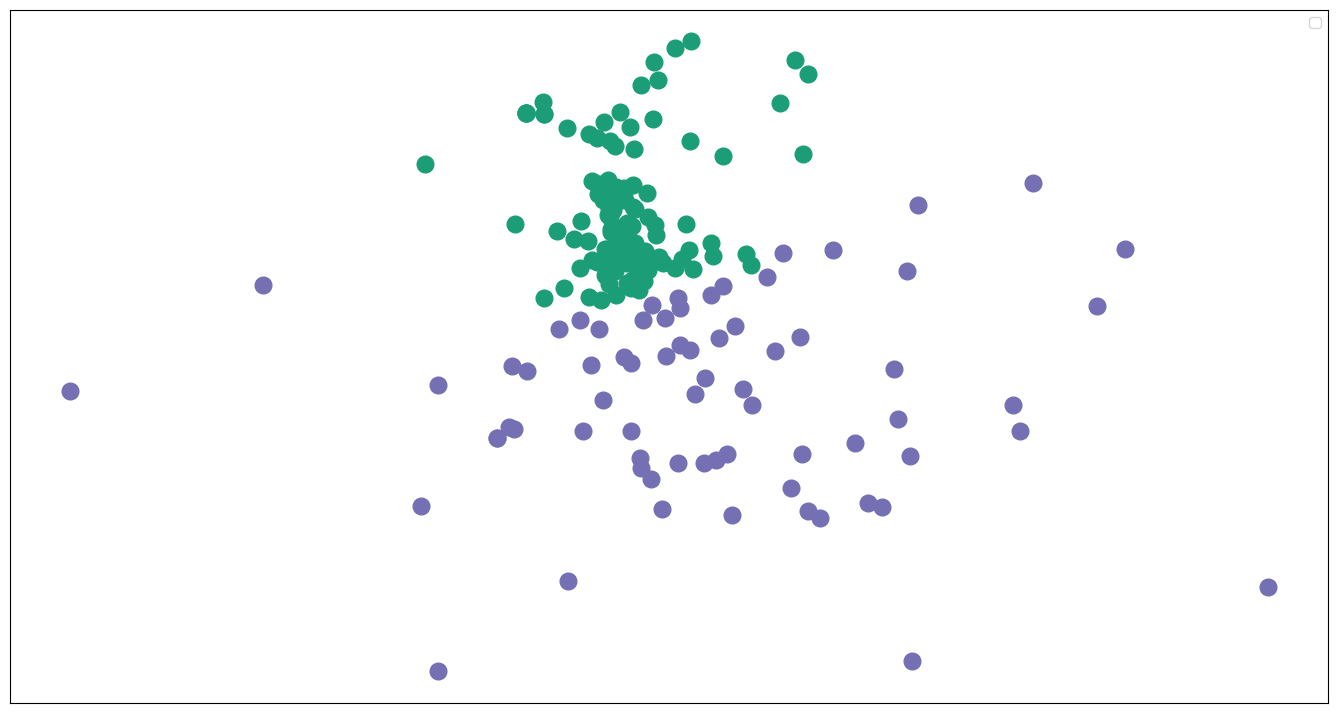

In [60]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
        #    label=cluster_names[name],
            color=cluster_colors[name])
        #    mec='non')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)

ax.legend(numpoints=1)  #show legend with only 1 point


plt.show() #show the plot
